<a href="https://colab.research.google.com/github/sidp7/SOM-with-ANN/blob/main/SOM_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1 - Self Organizing Map**

Installing packages and importing libraries

In [ ]:
!pip install MiniSom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

Training the SOM

In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

Visualizing the results

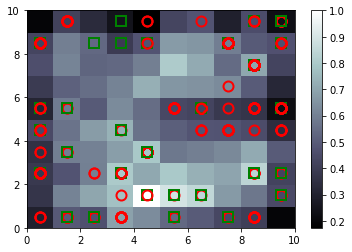

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

Finding the frauds

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,1)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

Printing the Fraud Clients

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15690372
15586174
15775750
15788776
15765257
15764226
15775235
15780088
15767231
15690492
15762716
15768474
15762045
15750476
15761047
15687527
15717065
15721569
15799859
15646563
15789014
15652048
15771409
15814116


**Part 2 - Going from Unsupervised to Supervised Deep Learning**

Creating Matrix of features

In [ ]:
customers = dataset.iloc[:,1:].values

Creating the dependent variable

In [ ]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1


**Part 3 - ANN**

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

Import Tensorflow

In [ ]:
import tensorflow as tf

Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

Adding the input layer and first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

Adding the Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Training the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the ANN on the training set

In [ ]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 30)

Epoch 1/30
690/690 [==============================] - 1s 804us/step - loss: 0.0256 - accuracy: 0.9899
Epoch 2/30
690/690 [==============================] - 1s 841us/step - loss: 0.0250 - accuracy: 0.9899
Epoch 3/30
690/690 [==============================] - 1s 803us/step - loss: 0.0255 - accuracy: 0.9899
Epoch 4/30
690/690 [==============================] - 1s 863us/step - loss: 0.0255 - accuracy: 0.9899
Epoch 5/30
690/690 [==============================] - 1s 842us/step - loss: 0.0250 - accuracy: 0.9913
Epoch 6/30
690/690 [==============================] - 1s 855us/step - loss: 0.0254 - accuracy: 0.9899
Epoch 7/30
690/690 [==============================] - 1s 872us/step - loss: 0.0246 - accuracy: 0.9913
Epoch 8/30
690/690 [==============================] - 1s 838us/step - loss: 0.0249 - accuracy: 0.9899
Epoch 9/30
690/690 [==============================] - 1s 841us/step - loss: 0.0252 - accuracy: 0.9913
Epoch 10/30
690/690 [==============================] - 1s 811us/step - loss: 0.024

Predicting the test results

In [ ]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [ ]:
print(y_pred)

[[1.56739070e+07 0.00000000e+00]
 [1.57289060e+07 0.00000000e+00]
 [1.56355980e+07 0.00000000e+00]
 ...
 [1.57064640e+07 7.82054663e-01]
 [1.56378910e+07 7.82054663e-01]
 [1.57610470e+07 7.82054663e-01]]
